In [20]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

## **EXERCISE: KNN**

**Gunakan dataset 'cancer'**

- Pada latihan ini, kita sebagai data scientist di bidang kedokteran diminta untuk menentukan apakah sebuah tumor merupakan kanker ganas (malignant) atau jinak (benign)

- Untuk simplifikasi, kita hanya akan menggunakan 2 feature:
    - Features: 'texture_mean' dan 'concave points_mean'
    - Target: 'diagnosis'
<br><br>

- Buat kolom baru yang berasal dari kololm diagnosis. Ubah dari string menjadi integer 
    - malignant --> 1
    - benign --> 0
<br><br>

- Lakukan splitting pada dataset dengan:
    - 20% test set 
    - random_state = 42
<br><br>

- Lakukan modeling dengan KNN   
- Temukan nilai K terbaik untuk model KNN, lalu gunakan metriks accuracy untuk mengevaluasi performa model antara KNN tanpa dan dengan scaling (MinMaxScaler). 

**Informasi terkait dataset dapat dilihat pada link berikut:** 

<https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)> 
**atau** 
<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data> 

In [21]:
df = pd.read_csv('cancer_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
df[['diagnosis','texture_mean','concave points_mean']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   diagnosis            569 non-null    object 
 1   texture_mean         569 non-null    float64
 2   concave points_mean  569 non-null    float64
dtypes: float64(2), object(1)
memory usage: 13.5+ KB


In [23]:
df[['diagnosis','texture_mean','concave points_mean']].isna().sum()

diagnosis              0
texture_mean           0
concave points_mean    0
dtype: int64

In [24]:
df[['diagnosis','texture_mean','concave points_mean']].duplicated().sum()

0

In [25]:
dfo = df[['diagnosis','texture_mean','concave points_mean']].copy()

for column in dfo.columns:
    if pd.api.types.is_numeric_dtype(dfo[column]):
        Q1 = dfo[column].quantile(0.25)
        Q3 = dfo[column].quantile(0.75)
        IQR = Q3 - Q1     
        outliers = (dfo[column] < Q1 - 1.5 * IQR) | (dfo[column] > Q3 + 1.5 * IQR)
        dfo = dfo[~outliers]
    else:
        pass

dfo.head()

,diagnosis,texture_mean,concave points_mean
0,M,10.38,0.14710
1,M,17.77,0.07017
2,M,21.25,0.12790
3,M,20.38,0.10520
4,M,14.34,0.10430


In [26]:
dfo['diagnosis'].value_counts()

diagnosis
B    355
M    196
Name: count, dtype: int64

In [27]:
dfo['diagnosis']=dfo['diagnosis'].map({'M':1,'B':0})
dfo.head()

,diagnosis,texture_mean,concave points_mean
0,1,10.38,0.14710
1,1,17.77,0.07017
2,1,21.25,0.12790
3,1,20.38,0.10520
4,1,14.34,0.10430


# EDA

In [28]:
Y = dfo['diagnosis']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [29]:
X = dfo.drop(columns=['diagnosis'])
X

,texture_mean,concave points_mean
0,10.38,0.14710
1,17.77,0.07017
2,21.25,0.12790
3,20.38,0.10520
4,14.34,0.10430
...,...,...
563,25.09,0.14740
564,22.39,0.13890
565,28.25,0.09791
566,28.08,0.05302


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)
display(X_train, X_test, Y_train, Y_test)

,texture_mean,concave points_mean
541,24.99,0.038900
213,25.56,0.065970
211,18.94,0.013930
52,18.24,0.013490
316,14.08,0.005051
...,...,...
389,23.21,0.102100
101,13.43,0.000000
174,15.15,0.000000
254,19.33,0.085910


,texture_mean,concave points_mean
7,20.83,0.05985
71,14.64,0.02872
295,13.27,0.01917
568,24.54,0.00000
244,23.50,0.08886
...,...,...
515,18.61,0.02594
105,15.56,0.09601
208,22.54,0.05102
538,25.49,0.00000


541    0
213    1
211    0
52     0
316    0
      ..
389    1
101    0
174    0
254    1
520    0
Name: diagnosis, Length: 440, dtype: int64

7      1
71     0
295    0
568    0
244    1
      ..
515    0
105    1
208    0
538    0
222    0
Name: diagnosis, Length: 111, dtype: int64

# Modeling and Accuracy without Scaling

   k  accuracy
0  1   0.81982


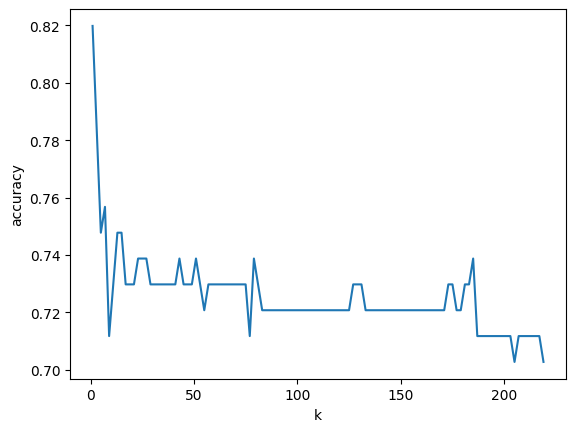

In [31]:
df_acc = pd.DataFrame(columns=['k','accuracy'])

for i in range (1,221,2):
    model_knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train)
    Y_predict = model_knn.predict(X_test)
    df_acc.loc[len(df_acc)] = {'k': i, 'accuracy': accuracy_score(Y_test, Y_predict)}

print(df_acc[df_acc['accuracy']==df_acc['accuracy'].max()])
sns.lineplot(data=df_acc, x='k', y='accuracy')
plt.show()

# Modeling and Accuracy with Scaling

In [32]:
X_train = MinMaxScaler().fit(X_train).transform(X_train)
X_test = MinMaxScaler().fit(X_test).transform(X_test)
display(X_train,X_test)

array([[0.75419546, 0.25864362],
       [0.78232971, 0.43863032],
       [0.45557749, 0.09261968],
       [0.42102665, 0.08969415],
       [0.21569595, 0.03358378],
       [0.74925962, 0.28417553],
       [0.44619941, 0.20957447],
       [0.40572557, 0.03718085],
       [0.90572557, 0.21775266],
       [0.59279368, 0.37220745],
       [0.45014808, 0.42333777],
       [0.3094768 , 0.19574468],
       [0.54244817, 0.14414894],
       [0.29072063, 0.24807181],
       [0.43139191, 0.13756649],
       [0.41806515, 0.36994681],
       [0.38746298, 0.29521277],
       [0.48371175, 0.61130319],
       [0.88005923, 0.48962766],
       [0.03307009, 0.97805851],
       [0.46051333, 0.14827128],
       [0.04985192, 0.05922207],
       [0.5834156 , 0.13351064],
       [0.60217177, 0.45525266],
       [0.45952616, 0.05674867],
       [0.36080948, 0.16329787],
       [0.5266535 , 0.69946809],
       [0.62586377, 0.92353723],
       [0.34106614, 0.09109043],
       [0.58538993, 0.16117021],
       [0.

array([[0.53962264, 0.39873418],
       [0.20592992, 0.19133911],
       [0.13207547, 0.12771486],
       [0.73962264, 0.        ],
       [0.68355795, 0.59200533],
       [0.26792453, 0.06620253],
       [0.26307278, 0.5389074 ],
       [0.70188679, 0.45789474],
       [0.57088949, 0.07168554],
       [0.30134771, 0.32285143],
       [0.43126685, 0.79546969],
       [0.59622642, 0.53171219],
       [0.44690027, 0.07648235],
       [0.64366577, 0.49853431],
       [0.26361186, 0.2071952 ],
       [0.33045822, 0.25189873],
       [0.33315364, 0.11319121],
       [0.30727763, 0.15136576],
       [0.53908356, 0.36235843],
       [0.        , 0.17475017],
       [0.45929919, 0.19487009],
       [0.25283019, 0.46908728],
       [0.24366577, 0.2320453 ],
       [0.53584906, 0.40113258],
       [0.53477089, 0.2338441 ],
       [0.74770889, 0.20552965],
       [0.62911051, 0.45116589],
       [0.406469  , 0.11838774],
       [0.28086253, 0.15469687],
       [0.69703504, 0.61132578],
       [0.

     k  accuracy
5   11   0.90991
14  29   0.90991
15  31   0.90991


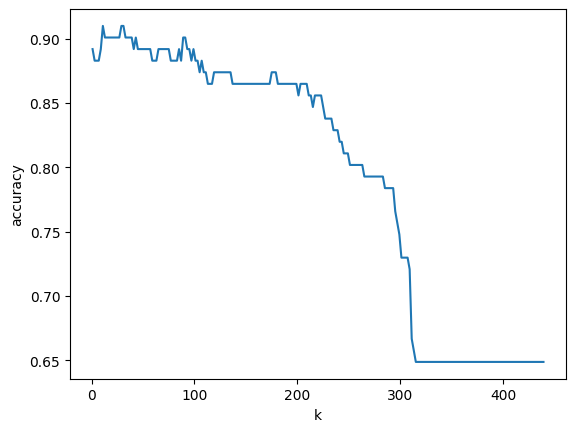

In [33]:
df_acc = pd.DataFrame(columns=['k','accuracy'])

for i in range (1,len(Y_train),2):
    model_knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train)
    Y_predict = model_knn.predict(X_test)
    df_acc.loc[len(df_acc)] = {'k': i, 'accuracy': accuracy_score(Y_test, Y_predict)}

print(df_acc[df_acc['accuracy']==df_acc['accuracy'].max()])
sns.lineplot(data=df_acc, x='k', y='accuracy')
plt.show()

In [34]:
model_knn = KNeighborsClassifier(n_neighbors=11).fit(X_train,Y_train)
Y_predict = model_knn.predict(X_test)
print(f'Nilai k terbaik didapatkan ketika dilakukan scaling terlebih dahulu dengan nilai k=11 dan akurasinya {round(accuracy_score(Y_test, Y_predict)*100)} %')

Nilai k terbaik didapatkan ketika dilakukan scaling terlebih dahulu dengan nilai k=11 dan akurasinya 91 %
